# Lyric Cloud

### Import necessary Libraries

In [1]:
import requests
import json
import spotipy
import os
from dotenv import load_dotenv
load_dotenv()

True


## 1. Gathering recently played song information from Spotify




### Defining necessary info and authenticating Spotify user

In [2]:
USERNAME = "jordantwells"
SP_CLIENT_ID = os.environ.get('LC_CLIENT_ID')
SP_CLIENT_SECRET = os.environ.get('LC_CLIENT_SECRET')
REDIRECT_URI = "http://example.com/callback/"
SP_SCOPE = "user-read-recently-played"

tk = spotipy.util.prompt_for_user_token(USERNAME, SP_SCOPE, SP_CLIENT_ID, SP_CLIENT_SECRET, REDIRECT_URI)
sp = spotipy.Spotify(auth = tk)

### Grabbing recently played song titles

In [3]:
recently_played_data = sp.current_user_recently_played(limit = 15)

song_titles = []
song_artists = []

for item in recently_played_data['items']:
    song_titles.append(item["track"]['name'])
    song_artists_per_song = [artist["name"] for artist in item["track"]["artists"]]
    song_artists.append(song_artists_per_song)

print(song_artists)

[['ABSRDST'], ['Anomalie'], ['Closure in Moscow'], ['Yasushi Yoshida'], ['Jacob Collier'], ['Grant Stinnett'], ['Rob Araujo', 'quickly, quickly'], ['YeYe'], ['tricot'], ['fox capture plan'], ['toe'], ['toconoma'], ['JYOCHO'], ['fox capture plan'], ['ADAM at']]


## 2. Gathering song lyrics from Genius

### Defining necessary information for Genius Authentication

In [4]:
GE_API_URL = "https://api.genius.com/"
GE_SCOPE = "me"
GE_ACCESS_TOKEN = os.environ.get("GE_ACCESS_TOKEN")

headers = {"Authorization" : "Bearer "+ GE_ACCESS_TOKEN}

### Creating function which will "scrape" lyrics from a Genius song page

In [5]:
from bs4 import BeautifulSoup
def lyric_scraper(url):
    page = requests.get(url)
    html = BeautifulSoup(page.text, "html.parser")
    [h.extract() for h in html('script')]
    lyrics = html.find("div",  class_= "lyrics").get_text()
    return lyrics
print(song_titles)

['Imaginary Friend', 'Ouverture', 'ピンクレモネード', 'Last Days', 'Moon River', '4 Producers', '35mm', 'ゆらゆら', '爆裂パニエさん', 'Internal Conflict', "all I understand is that I don't understand", 'DeLorean', 'ユークリッド', '夜間航路', 'Moonlight Syndrome']



### Searching Genius for recently played song titles and "scraping" their lyrics

In [6]:
all_lyrics = ""
for i, song_title in enumerate(song_titles):
    search = requests.get(GE_API_URL + "search", headers = headers, params = {"q" : song_title}).json()
    hits = search["response"]["hits"]
    
    if len(hits) != 0:
        result = hits[0]["result"]
        artists = result["primary_artist"]["name"].split(",")
        
        #Splitting on & here fixes some problems with musicals
        if (artists[0].split(" &")[0] in song_artists[i]) or (artists[0] in song_artists[i]):
            result_url = result["url"]
            print(result_url)
            lyric = lyric_scraper(result_url)
            all_lyrics += lyric
        
import re
regex = re.compile(".*?\[(.*?)\]")
all_lyrics = re.sub(regex, "", all_lyrics)

https://genius.com/Closure-in-moscow--lyrics
https://genius.com/Yeye-yurayura-lyrics


## 3. Generating word cloud using wordcloud Python library

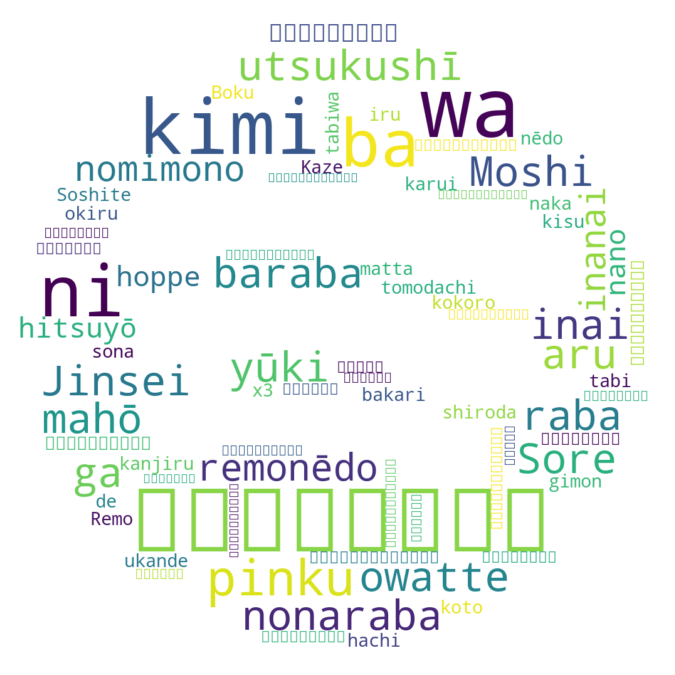

In [8]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

mask = np.array(Image.open("spotify_logo.png"))

wc = WordCloud(background_color="white", max_words=2000, mask=mask, contour_width=0, contour_color='steelblue')
wc.generate(all_lyrics)

plt.figure(figsize=(9, 5), dpi = 170)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()